In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
FS = 1 / 0.005
FS

200.0

In [3]:
values = []

with open("DATA1.crd", "r") as f:
    
    lines = f.readlines()
    for i, l in enumerate(lines):
        if i > 0:
            m = l.strip().split(",")
            values.append([int(m[0]), int(m[1])])
values = np.array(values)

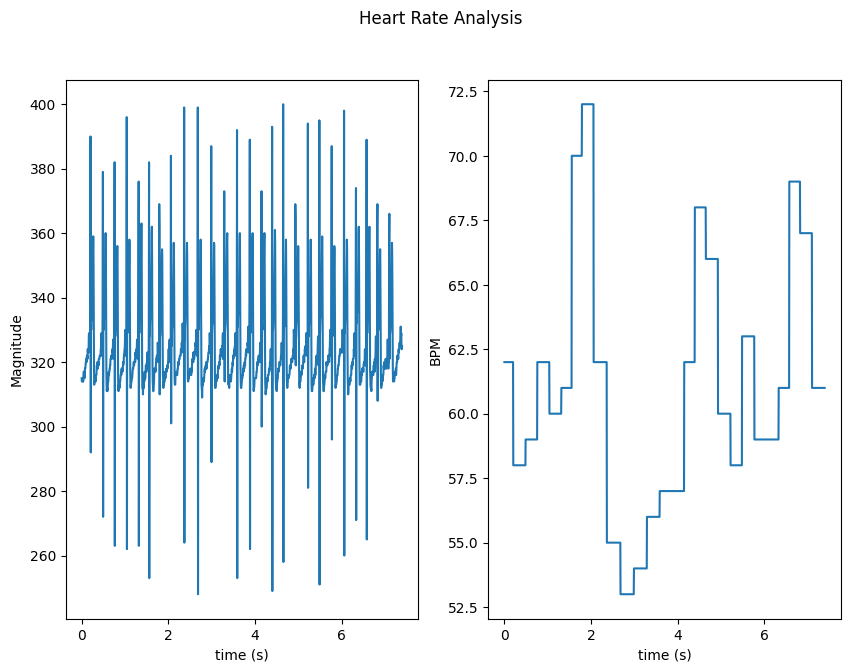

In [4]:
time = np.arange(len(values))

fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].plot(time / FS, values[:, 0])
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("Magnitude")

ax[1].plot(time / FS, values[:, 1])
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("BPM")

fig.suptitle("Heart Rate Analysis")
plt.show()

In [5]:
mean = np.mean(values[:, 1])
mean

np.float64(60.92494929006085)

In [6]:
def to_binary(x: np.ndarray, col: int) -> list[str]:
    to_bit = []
    for i in range(x.shape[0]):
        b = np.binary_repr(x[i, 1], width=10)
        to_bit.append(b)
    return to_bit

In [7]:
bpm_to_bit = to_binary(x=values, col=1)
mag_to_bit = to_binary(x=values, col=0)

In [12]:
with open("bpm_bit.txt", "w") as f:
    for v in bpm_to_bit:
        for b in v:
            f.write(f"{b} ")
        f.write("\n")

In [13]:
with open("mag_to_bit.txt", "w") as f:
    for v in mag_to_bit:
        for b in v:
            f.write(f"{b} ")
        f.write("\n")